### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import math

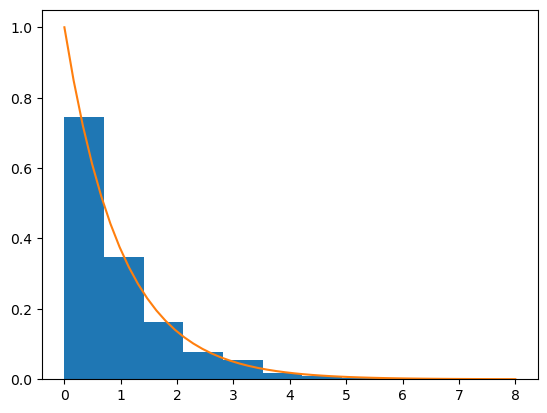

In [2]:
dist = sp.stats.gamma(a = 1, loc = 0, scale = 1)
sample= dist.rvs(size = 1000)
x= np.linspace(0,8)
plt.hist(sample, density = True)
plt.plot(x, dist.pdf(x))

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

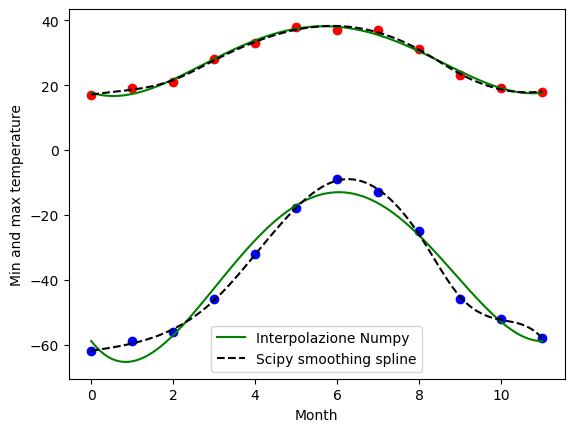

In [3]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")



x_interp = np.linspace(0,11,111)

#Interpolazione Numpy
coeffs_min = np.polyfit(months, temp_min, deg=4)
coeffs_max = np.polyfit(months, temp_max, deg=4)

y_interp_min = np.polyval(coeffs_min, x_interp)
y_interp_max = np.polyval(coeffs_max, x_interp)

plt.plot(x_interp, y_interp_min, color = 'green', label = 'Interpolazione Numpy')
plt.plot(x_interp, y_interp_max, color = 'green')

#Smoothing spline con SciPy
spline_min = sp.interpolate.UnivariateSpline(months, temp_min, s=4)
spline_max = sp.interpolate.UnivariateSpline(months, temp_max, s=4)

y_smooth_min = spline_min(x_interp)
y_smooth_max = spline_max(x_interp)

plt.plot(x_interp, y_smooth_min, label= 'Scipy smoothing spline', linestyle = '--', color = 'black')
plt.plot(x_interp, y_smooth_max, linestyle = '--', color = 'black')

plt.legend()

In [4]:
len(y_interp_min)
np.arange(0,111,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [5]:
mae_min_numpy = np.mean(np.abs(temp_min - y_interp_min[months*10]))
rmse_min_numpy = np.sqrt(np.mean((temp_min - y_interp_min[months*10])**2))
print('Temp_min (numpy) Mae: {}\n                 Rmse: {}'.format(mae_min_numpy,rmse_min_numpy))

mae_max_numpy = np.mean(np.abs(temp_max - y_interp_max[months*10]))
rmse_max_numpy = np.sqrt(np.mean((temp_max - y_interp_max[months*10])**2))
print('Temp_max (numpy) Mae: {}\n                 Rmse: {}'.format(mae_max_numpy,rmse_max_numpy))



mae_min_scipy = np.mean(np.abs(temp_min - y_smooth_min[months*10]))
rmse_min_scipy = np.sqrt(np.mean((temp_min - y_smooth_min[months*10])**2))
print('Temp_min (scipy) Mae: {}\n                 Rmse: {}'.format(mae_min_scipy,rmse_min_scipy))

mae_max_scipy = np.mean(np.abs(temp_max - y_smooth_max[months*10]))
rmse_max_scipy = np.sqrt(np.mean((temp_max - y_smooth_max[months*10])**2))
print('Temp_max (scipy) Mae: {}\n                 Rmse: {}'.format(mae_max_scipy,rmse_max_scipy))



Temp_min (numpy) Mae: 2.9569735819736844
                 Rmse: 3.487912490377805
Temp_max (numpy) Mae: 0.7811771561771629
                 Rmse: 0.9301038867208512
Temp_min (scipy) Mae: 0.48514603259322886
                 Rmse: 0.5774858160581238
Temp_max (scipy) Mae: 0.4632971640712669
                 Rmse: 0.5772418136444493


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [6]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


MAE: 53.207740576063784
RMSE: 64.74001336626779


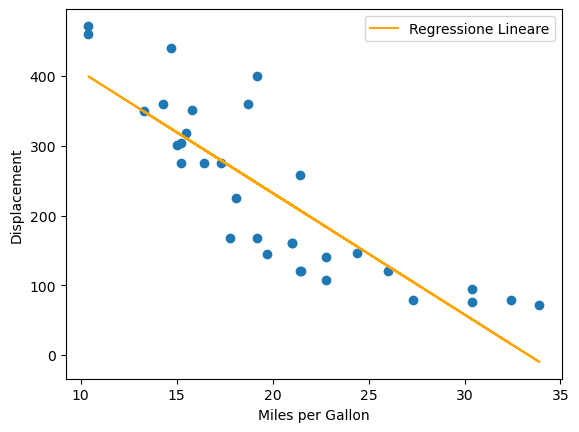

In [19]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df.mpg, df.disp)

y_fit_sp = slope * df.mpg + intercept



plt.scatter(df.mpg, df.disp)
plt.plot(df.mpg, y_fit_sp, label='Regressione Lineare', color='orange')
plt.xlabel('Miles per Gallon')
plt.ylabel('Displacement')
plt.legend()

print("MAE: {}".format(np.mean(np.abs(df.disp - y_fit_sp))))
print("RMSE: {}".format(np.sqrt(np.mean((np.abs(df.disp - y_fit_sp)**2)))))